#### Setup: Working with the Database
**Install and import the needed libraries**


**Download and connect to the database file.**
Download and load the dataset into a `pandas` DataFrame.

file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



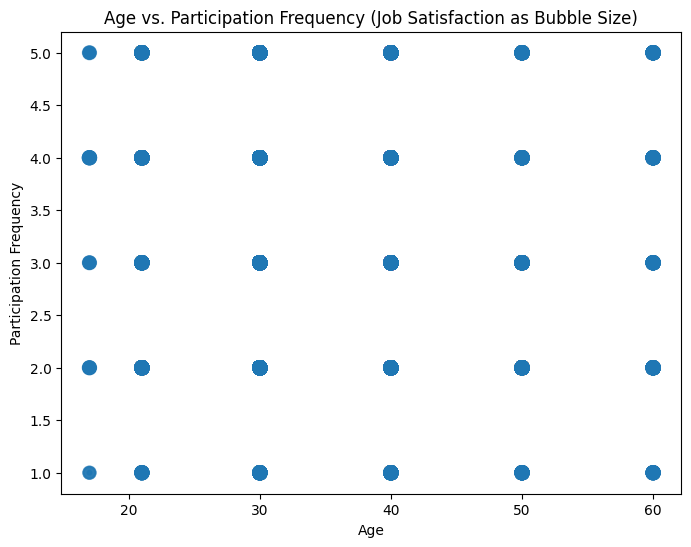

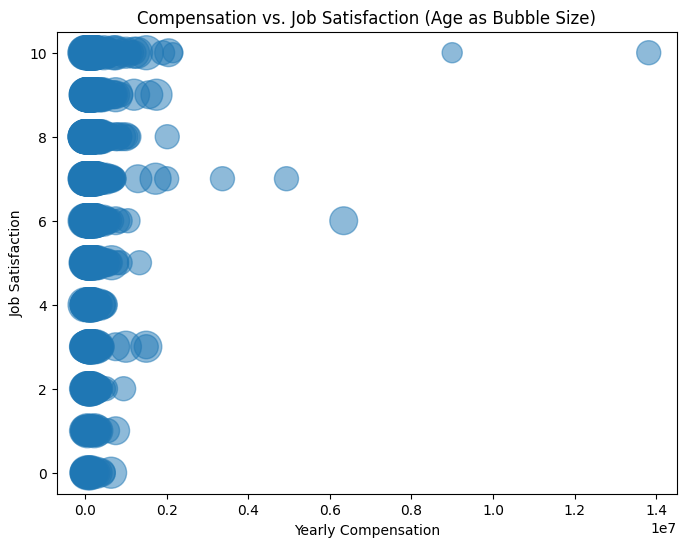

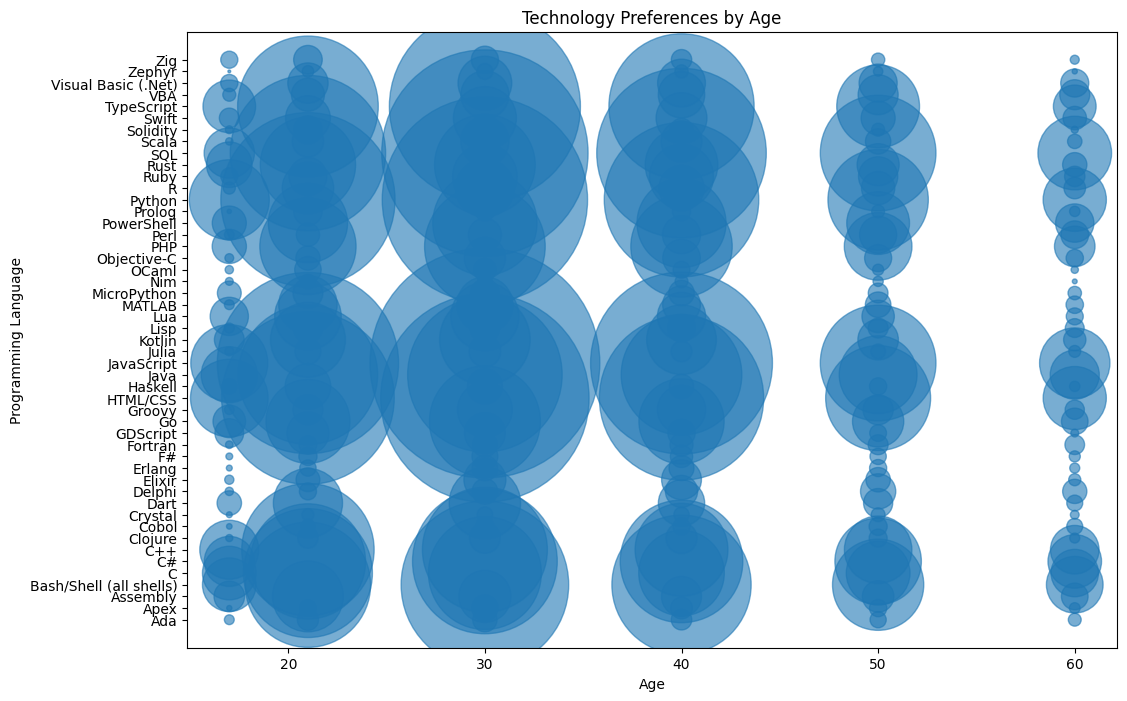

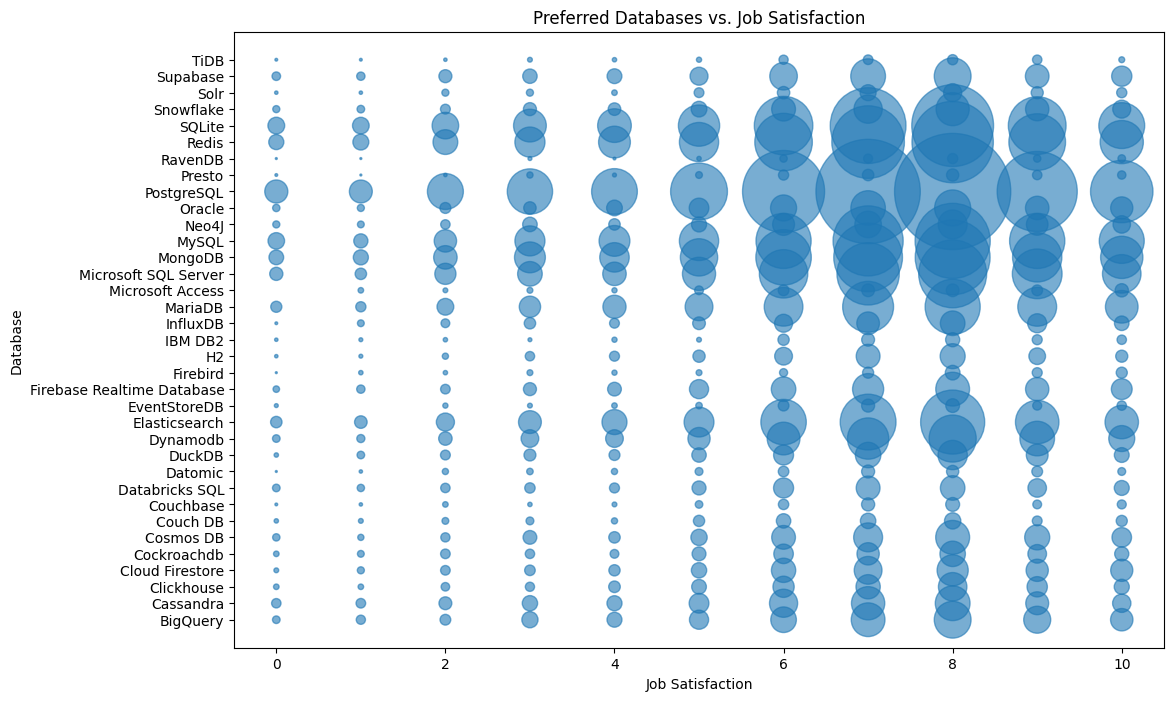

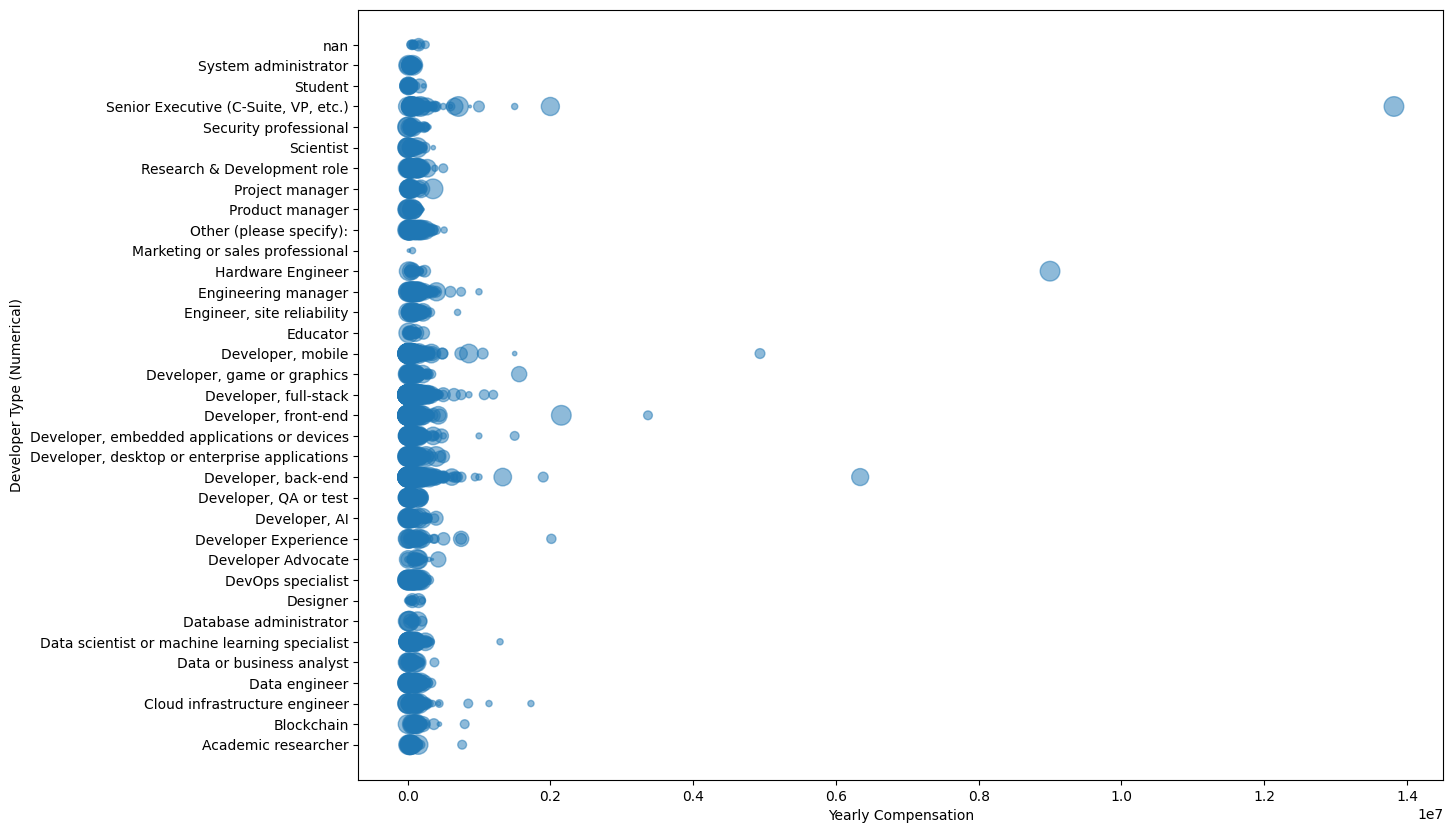

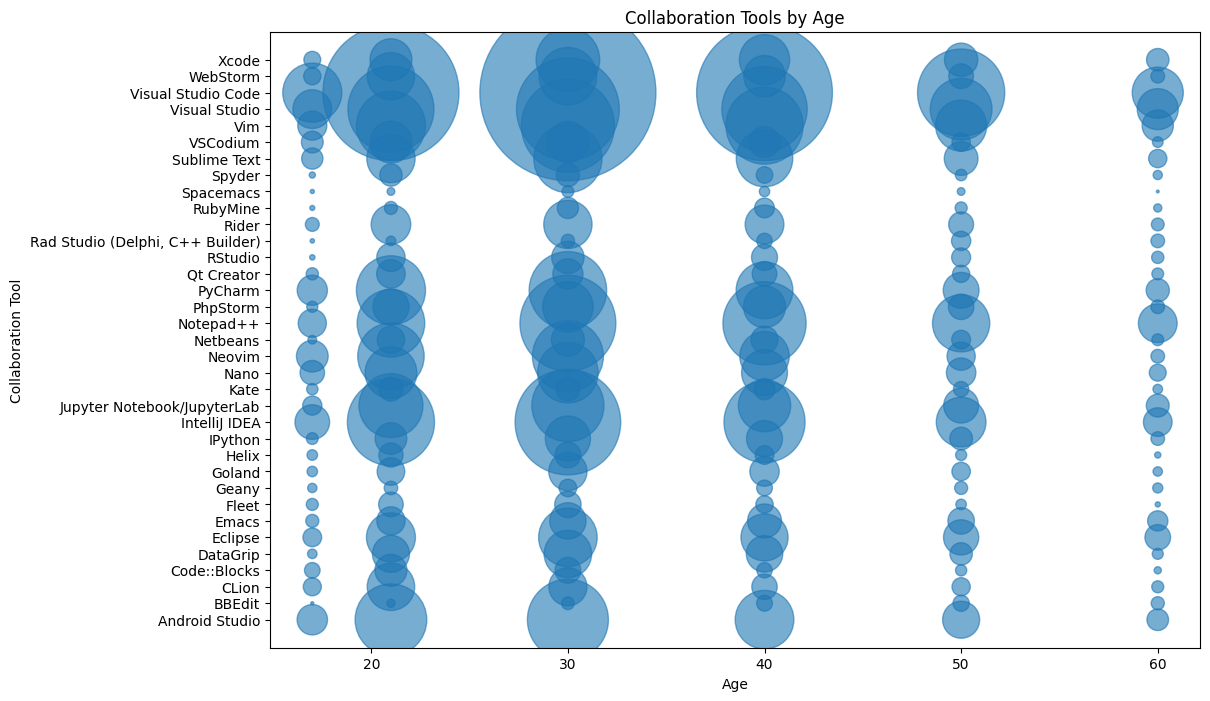

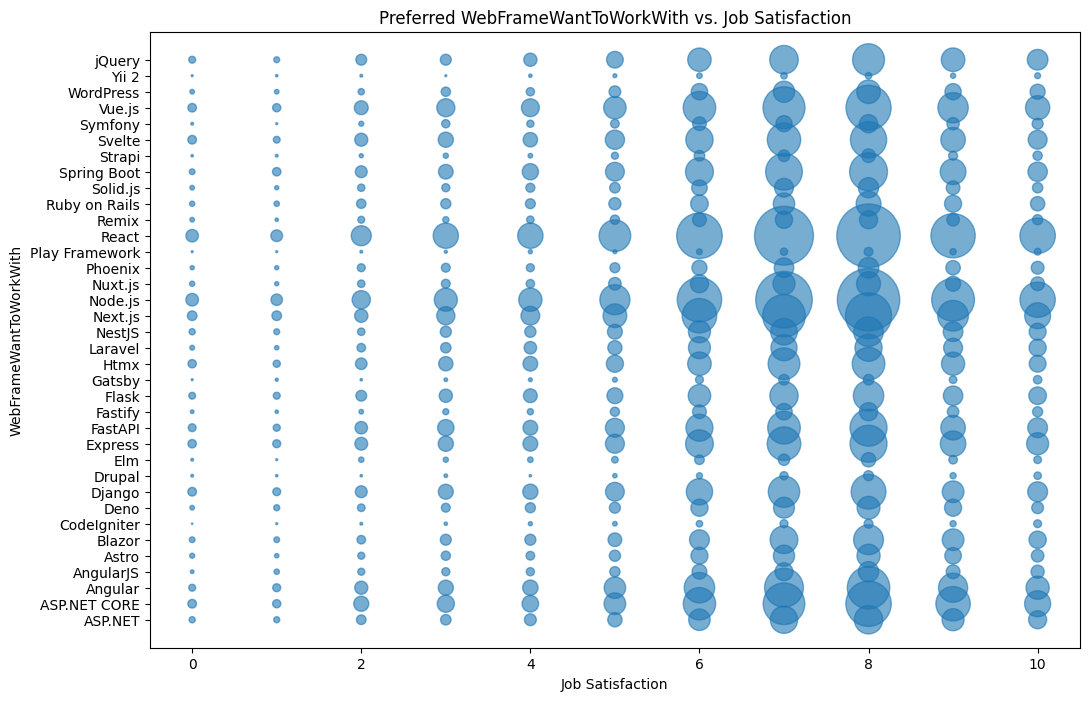

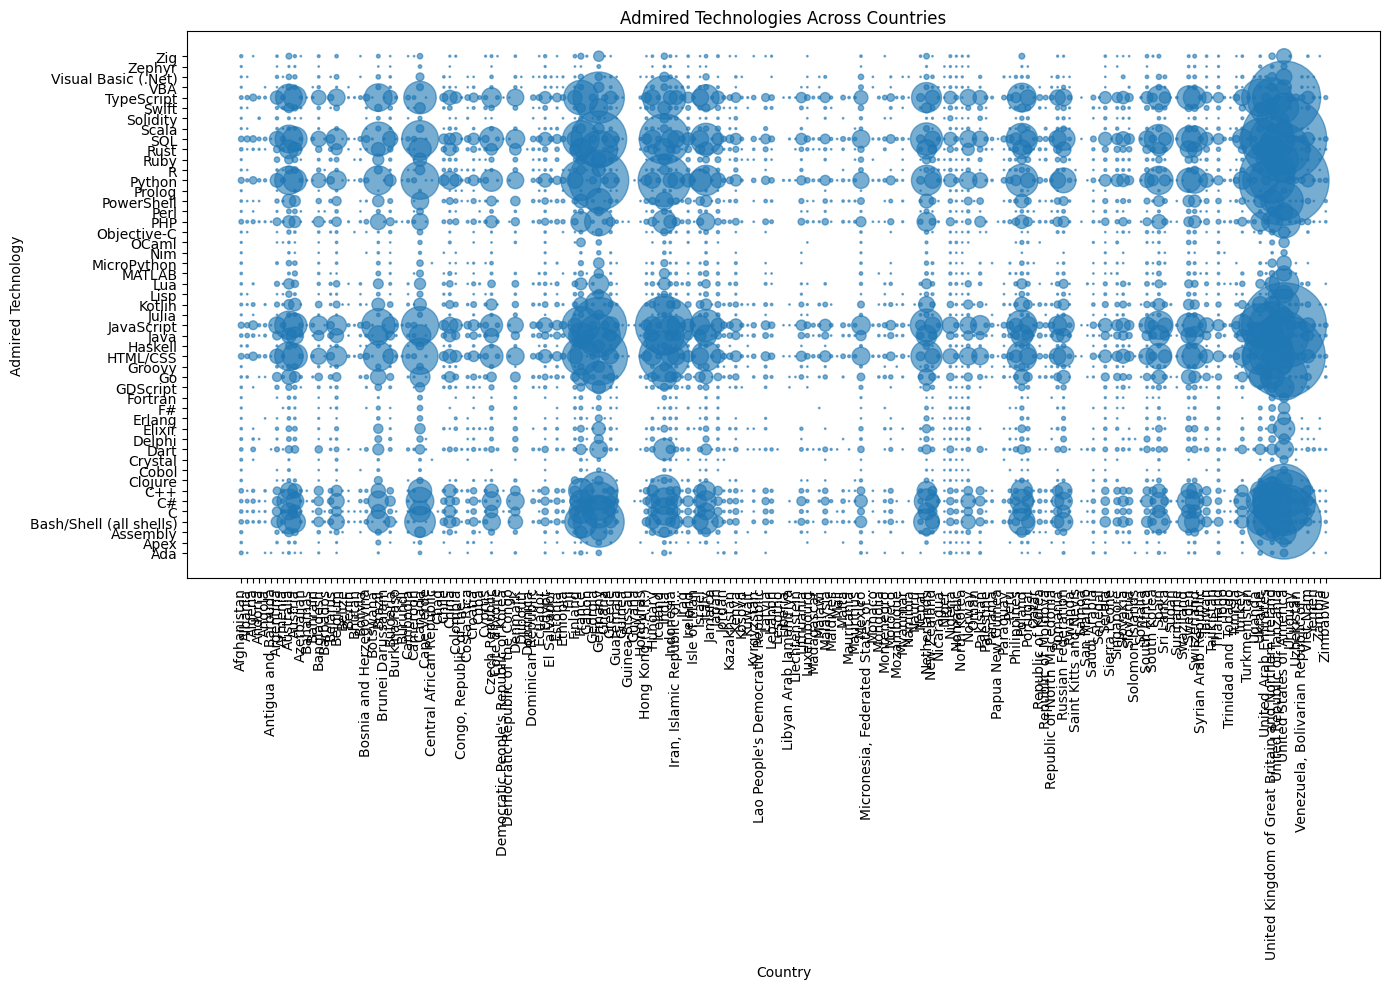

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder


# Download and load the dataset
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(file_path)


# Data preprocessing (convert relevant columns to numeric)

df['AgeNumeric'] = df['Age'].map({
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65-74 years old': 70,
    '75 years or older': 75,
    'Prefer not to say': None
}).astype(float)


df['SOPartFreq'] = df['SOVisitFreq'].map({
    'Never': 0,
    'Less than once per month or monthly': 1,
    'A few times per week': 2,
    'A few times per month or weekly': 3,
    'Daily or almost daily': 4,
    'Multiple times per day': 5,
    'I have never participated in Q&A on Stack Overflow': 0
}).astype(float)

numeric_cols = ['Age', 'ConvertedCompYearly', 'JobSat', 'YearsCodePro']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# Task 1: Exploring Data Distributions
# 1. Age vs. Participation Frequency (JobSat as bubble size)
plt.figure(figsize=(8, 6))
plt.scatter(df['AgeNumeric'], df['SOPartFreq'], s=df['JobSat']*10, alpha=0.5) # job sat bubble size
plt.title('Age vs. Participation Frequency (Job Satisfaction as Bubble Size)')
plt.xlabel('Age')
plt.ylabel('Participation Frequency')
plt.show()

# 2. Compensation vs. Job Satisfaction (Age as bubble size)
plt.figure(figsize=(8, 6))
plt.scatter(df['ConvertedCompYearly'], df['JobSat'], s=df['AgeNumeric']*10, alpha=0.5) # Age bubble size
plt.title('Compensation vs. Job Satisfaction (Age as Bubble Size)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.show()




# Task 2: Analyzing Relationships
# 1. Technology Preferences by Age
languages = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('Language')
language_age = df[['AgeNumeric']].join(languages, how='right')
language_counts = language_age.groupby(['AgeNumeric','Language'])['Language'].count().reset_index(name='Count')


plt.figure(figsize=(12, 8))
plt.scatter(language_counts['AgeNumeric'], language_counts['Language'], s=language_counts['Count']*2, alpha=0.6)
plt.title('Technology Preferences by Age')
plt.xlabel('Age')
plt.ylabel('Programming Language')
plt.show()


# 2. Preferred Databases vs. Job Satisfaction
databases = df['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('Database')
database_satisfaction = df[['JobSat']].join(databases,how='right')
database_counts = database_satisfaction.groupby(['Database','JobSat'])['JobSat'].count().reset_index(name='Count')

plt.figure(figsize=(12, 8))
plt.scatter(database_counts['JobSat'], database_counts['Database'], s=database_counts['Count']*2, alpha=0.6) # Job satisfaction bubble size
plt.title('Preferred Databases vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Database')
plt.show()




# Task 3: Comparing Data
# 1. Compensation Across Developer Roles (using Label Encoding)

le = LabelEncoder()  # Create a LabelEncoder object

# Fit and transform the "DevType" column
df['DevTypeNum'] = le.fit_transform(df['DevType'])
                                   
plt.figure(figsize=(14, 10))
#plt.scatter('ConvertedCompYearly','DevTypeNum',s='JobSatPoints_6'*2,alpha=0.5,data=df) #Jobsatisfaction by size
plt.scatter(df['ConvertedCompYearly'], df['DevTypeNum'], s=df['JobSatPoints_6'] * 2, alpha=0.5)
plt.xlabel('Yearly Compensation')
plt.ylabel('Developer Type (Numerical)')
plt.yticks(df['DevTypeNum'].unique(), df['DevType'].unique())  # Adding correct string labels

plt.show()

# 2. Collaboration Tools by Age
collab_tools = df['NEWCollabToolsHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('CollabTool')
collab_age = df[['AgeNumeric']].join(collab_tools, how='right')
collab_counts = collab_age.groupby(['AgeNumeric','CollabTool'])['CollabTool'].count().reset_index(name='Count')


plt.figure(figsize=(12, 8))
plt.scatter(collab_counts['AgeNumeric'], collab_counts['CollabTool'], s=collab_counts['Count'], alpha=0.6)
plt.title('Collaboration Tools by Age')
plt.xlabel('Age')
plt.ylabel('Collaboration Tool')
plt.show()



# Task 4: Visualizing Technology Trends
# 1. Preferred Web Frameworks vs. Job Satisfaction
webframe = df['WebframeWantToWorkWith'].str.split(';',expand=True).stack().reset_index(level=1,drop=True).rename('WebFrame')
webfram_jobsatisfaction=df[['JobSat']].join(webframe, how='right')
webframe_counts = webfram_jobsatisfaction.groupby(['WebFrame', 'JobSat'])['JobSat'].count().reset_index(name='Count')

plt.figure(figsize=(12, 8))
plt.scatter(webframe_counts['JobSat'], webframe_counts['WebFrame'], s=webframe_counts['Count'], alpha=0.6) # Job satisfaction bubble size
plt.title('Preferred WebFrameWantToWorkWith vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('WebFrameWantToWorkWith')
plt.show()


# 2. Admired Technologies Across Countries

admired_tech = df['LanguageAdmired'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('AdmiredTech')
tech_country = df[['Country']].join(admired_tech, how='right')
tech_counts = tech_country.groupby(['Country', 'AdmiredTech'])['AdmiredTech'].count().reset_index(name='Count')

plt.figure(figsize=(14, 10))
plt.scatter(tech_counts['Country'], tech_counts['AdmiredTech'], s=tech_counts['Count'], alpha=0.6)
plt.title('Admired Technologies Across Countries')
plt.xlabel('Country')
plt.ylabel('Admired Technology')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()